# CRM analysis
Customer Relationship Management (CRM) analysis involves the systematic examination and interpretation of data related to interactions between a business and its customers. Through CRM analysis, companies evaluate customer behavior, preferences, and feedback to gain valuable insights into their needs and expectations.

### Dataset Description:
The dataset encompasses transactions from 01/12/2010 to 09/12/2011 for a non-store online retail business based and registered in the UK. Specializing in distinctive all-occasion gifts, the company's clientele includes a significant number of wholesale customers.


### Variable Description
- InvoiceNo: Invoice number that consists 6 digits. If this code starts with letter 'c', it indicates a cancellation.
- StockCode: Product code that consists 5 digits.
- Description: Product name.
- Quantity: The quantities of each product per transaction.
- InvoiceDate: This represents the day and time when each transaction was generated.
- UnitPrice: Product price per unit.
- CustomerID: Customer number that consists 5 digits. Each customer has a unique customer ID.
- Country: Name of the country where each customer resides.


In [363]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [364]:
data_ = pd.read_csv("Ecom_CRM_analysis1.csv")
data_

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12-09-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12-09-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12-09-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12-09-2011 12:50,4.15,12680.0,France


In [444]:
data_[data_['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceType,TotalAmount,InvoiceYear,InvoiceMonth,TransactionType,Invoice_TimeBin,Recency,Frequency,Monetary
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom,Cancellation,-27.50,2010,12,ReturnTransaction,Morning,2,86,7709.69
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom,Cancellation,-4.65,2010,12,ReturnTransaction,Morning,0,118,59284.19
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,Cancellation,-19.80,2010,12,ReturnTransaction,Morning,217,3,-141.48
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,Cancellation,-6.96,2010,12,ReturnTransaction,Morning,217,3,-141.48
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,Cancellation,-6.96,2010,12,ReturnTransaction,Morning,217,3,-141.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535188,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom,Cancellation,-9.13,2011,12,ReturnTransaction,Morning,0,23,2556.68
536280,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom,Cancellation,-224.69,2011,12,ReturnTransaction,Morning,0,35,12396.46
536447,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom,Cancellation,-54.75,2011,12,ReturnTransaction,Morning,0,118,59284.19
536448,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom,Cancellation,-1.25,2011,12,ReturnTransaction,Morning,0,43,6193.43


## 1 . EDA ( Exploratory Data Analysis) 

In [365]:
data_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [366]:
# Checking for duplicate records
data_.duplicated().value_counts()

False    536641
True       5268
dtype: int64

In [367]:
# Handle duplicate records : drop the duplicate record (keep only 1 instance of it and remove all rest duplicates)
data_ = data_.drop_duplicates().reset_index(drop = True)

In [368]:
data_

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
536636,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12-09-2011 12:50,0.85,12680.0,France
536637,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12-09-2011 12:50,2.10,12680.0,France
536638,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12-09-2011 12:50,4.15,12680.0,France
536639,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12-09-2011 12:50,4.15,12680.0,France


In [369]:
# Null value check 
data_.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [370]:
# Finding Percentage of null values
(data_.isna().sum() / data_.shape[0] ) * 100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.270945
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     25.163377
Country         0.000000
dtype: float64

In [371]:
# Replacing Null values in CustomerId with 0 
data_['CustomerID'] = data_['CustomerID'].fillna(0)

# Replacing Null values in  Description with 'NA' 
data_['Description'] = data_['Description'].fillna('NA')

In [372]:
data_.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [373]:
# Finding unique values with count in Column Country ( To know customer distribution over countries) 
data_['Country'].value_counts()

United Kingdom          490300
Germany                   9480
France                    8541
EIRE                      8184
Spain                     2528
Netherlands               2371
Belgium                   2069
Switzerland               1994
Portugal                  1510
Australia                 1258
Norway                    1086
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Unspecified                442
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     294
USA                        291
Hong Kong                  284
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [374]:
# Number of unique customers 
data_['CustomerID'].nunique()

4373

#### Observation: 
- There are around 5268 duplicate records . Have droped the duplicate records from data.
- Column : Description and CustomerID are having Null values 
- Percentage of null values in CustomerID is 25.16 %  (approx).Replaced all Null values with 0
- Percentage of null values in Description is 0.27 % (approx).Replaced all Null values with 'NA'
- Most of the customers are from United Kingdom country .
- There are 4373 unique customers in dataset.

## 2. Feature Engineering 

In [375]:
data_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536641 entries, 0 to 536640
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536641 non-null  object 
 1   StockCode    536641 non-null  object 
 2   Description  536641 non-null  object 
 3   Quantity     536641 non-null  int64  
 4   InvoiceDate  536641 non-null  object 
 5   UnitPrice    536641 non-null  float64
 6   CustomerID   536641 non-null  float64
 7   Country      536641 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.8+ MB


### Note:

-  If InvoiceNo code starts with letter 'c', it indicates a cancellation. Create a new column to identify if it is cancellation or adjustoment of bad debt or normal invoice.

- Data type of InvoiceDate should be datetime .
- Data type of CustomerID should be int



In [376]:
# Converting data type of InvoiceDate to datetime
data_['InvoiceDate'] = pd.to_datetime(data_['InvoiceDate'])

# Converting CustomerId to int
data_['CustomerID'] = data_['CustomerID'].astype(int)

In [377]:
data_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536641 entries, 0 to 536640
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  object        
 1   StockCode    536641 non-null  object        
 2   Description  536641 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   CustomerID   536641 non-null  int32         
 7   Country      536641 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 30.7+ MB


- Note : Invoice number that consists 6 digits. If this code starts with letter 'c', it indicates a cancellation.Creating a new column to identify if it is cancellation (Cancellation) or adjustoment of bad debt (AdjustBadDebt) or a normal invoice (Normal).

- Note : Bad debt refers to loans or outstanding balances owed that are no longer deemed recoverable and must be written off.

In [378]:
data_.loc[data_['InvoiceNo'].str.lower().str.contains('c'),'InvoiceType'] = 'Cancellation'
data_.loc[data_['InvoiceNo'].str.lower().str.contains('a'),'InvoiceType'] = 'AdjustBadDebt'
data_.loc[(~data_['InvoiceNo'].str.lower().str.contains('c')) & (~data_['InvoiceNo'].str.lower().str.contains('a')),
          'InvoiceType'] = 'Normal'

In [379]:
data_['InvoiceType'].value_counts()

Normal           527387
Cancellation       9251
AdjustBadDebt         3
Name: InvoiceType, dtype: int64

In [380]:
data_.loc[ (data_['Quantity'] >= 0 ) &( data_['InvoiceType'] == 'Cancellation'),:]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceType


- Note : For all cancellation the quantity is negative so it is a return transaction

In [381]:
# Crating a new column to hold total invoice amount or total order amount ( = Qty * UnitPrice)
data_['TotalAmount'] = data_['UnitPrice'] * data_['Quantity']

In [382]:
# Extract Year and Month values from InvoiceDate to do more granular analysis 
data_['InvoiceYear'] = data_['InvoiceDate'].dt.year
data_['InvoiceMonth'] = data_['InvoiceDate'].dt.month


In [383]:
# Creating a column to check if Transaction is Return or Purchase transaction : 
# If Qty < 0 then return transaction else purchase

data_.loc[data_['Quantity'] < 0 ,'TransactionType'] = 'ReturnTransaction'
data_.loc[data_['Quantity'] >= 0 ,'TransactionType'] = 'PurchaseTransaction'

In [384]:
data_.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceType,TotalAmount,InvoiceYear,InvoiceMonth,TransactionType
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,Normal,15.30,2010,12,PurchaseTransaction
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Normal,20.34,2010,12,PurchaseTransaction
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,Normal,22.00,2010,12,PurchaseTransaction
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Normal,20.34,2010,12,PurchaseTransaction
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Normal,20.34,2010,12,PurchaseTransaction


In [385]:
data_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536641 entries, 0 to 536640
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   InvoiceNo        536641 non-null  object        
 1   StockCode        536641 non-null  object        
 2   Description      536641 non-null  object        
 3   Quantity         536641 non-null  int64         
 4   InvoiceDate      536641 non-null  datetime64[ns]
 5   UnitPrice        536641 non-null  float64       
 6   CustomerID       536641 non-null  int32         
 7   Country          536641 non-null  object        
 8   InvoiceType      536641 non-null  object        
 9   TotalAmount      536641 non-null  float64       
 10  InvoiceYear      536641 non-null  int64         
 11  InvoiceMonth     536641 non-null  int64         
 12  TransactionType  536641 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(1), int64(3), object(6)
memory usa

In [386]:
data_['TransactionType'].value_counts()

PurchaseTransaction    526054
ReturnTransaction       10587
Name: TransactionType, dtype: int64

In [387]:
(data_['TransactionType'].value_counts() / data_.shape[0]) * 100

PurchaseTransaction    98.027173
ReturnTransaction       1.972827
Name: TransactionType, dtype: float64

#### Observation : 
- There are 526054 Purchase Transaction records which amount to 98% of data .
- There are 10587 Return Transaction records which amount to 1.97 % of data.
- There are 9251 cancellation invoices . For all cancellation invoice the quantity is negative so it is a return transaction. So above return transaction count includes the cancellation invoices also. 
- There are 3 invoices to Adjust Bad Debt.

## 3. Outlier Check 

In [388]:
data_outlier = data_.describe()
data_outlier

,Quantity,UnitPrice,CustomerID,TotalAmount,InvoiceYear,InvoiceMonth
count,536641.000000,536641.000000,536641.000000,536641.000000,536641.000000,536641.000000
mean,9.620029,4.632656,11435.904653,18.123861,2010.921771,7.544820
std,219.130156,97.233118,6795.044250,380.656263,0.268532,3.508696
min,-80995.000000,-11062.060000,0.000000,-168469.600000,2010.000000,1.000000
25%,1.000000,1.250000,0.000000,3.750000,2011.000000,5.000000
50%,3.000000,2.080000,14336.000000,9.870000,2011.000000,8.000000
75%,10.000000,4.130000,16241.000000,17.400000,2011.000000,11.000000
max,80995.000000,38970.000000,18287.000000,168469.600000,2011.000000,12.000000


- Oulier check we can do on Quantity , UnitPrice , TotalAmount Column only.
- Doing outlier check on other columns like CustomerID , InvoiceYear and InoviceMonth will not make much sense

In [389]:
data_outlier.drop(['CustomerID','InvoiceYear','InvoiceMonth'],axis =1 ,inplace=True)

In [390]:
data_outlier

,Quantity,UnitPrice,TotalAmount
count,536641.000000,536641.000000,536641.000000
mean,9.620029,4.632656,18.123861
std,219.130156,97.233118,380.656263
min,-80995.000000,-11062.060000,-168469.600000
25%,1.000000,1.250000,3.750000
50%,3.000000,2.080000,9.870000
75%,10.000000,4.130000,17.400000
max,80995.000000,38970.000000,168469.600000


#### Checking count of outliers using IQR Method 

In [391]:
# Outlier using IQR (Inter Quartile Range)
data_outlier.loc['IQR',:] = data_outlier.loc['75%',:] - data_outlier.loc['25%',:]
data_outlier.loc['UW',:]  = data_outlier.loc['75%',:] + 1.5 * data_outlier.loc['IQR',:]
data_outlier.loc['LW',:]  = data_outlier.loc['25%',:] - 1.5 * data_outlier.loc['IQR',:]

In [392]:
data_outlier

,Quantity,UnitPrice,TotalAmount
count,536641.000000,536641.000000,536641.000000
mean,9.620029,4.632656,18.123861
std,219.130156,97.233118,380.656263
min,-80995.000000,-11062.060000,-168469.600000
25%,1.000000,1.250000,3.750000
50%,3.000000,2.080000,9.870000
75%,10.000000,4.130000,17.400000
max,80995.000000,38970.000000,168469.600000
IQR,9.000000,2.880000,13.650000
UW,23.500000,8.450000,37.875000


In [393]:
# Calculatig count of outlier in each of the columns : Quantity , UnitPrice and TotalAmount
for i in data_outlier.columns :
    count_ = data_[ (data_[i] > data_outlier.loc['UW',i]) | (data_[i] < data_outlier.loc['LW',i]) ].shape[0]
    data_outlier.loc['Outlier_Count',i] = count_ 

data_outlier

,Quantity,UnitPrice,TotalAmount
count,536641.000000,536641.000000,536641.000000
mean,9.620029,4.632656,18.123861
std,219.130156,97.233118,380.656263
min,-80995.000000,-11062.060000,-168469.600000
25%,1.000000,1.250000,3.750000
50%,3.000000,2.080000,9.870000
75%,10.000000,4.130000,17.400000
max,80995.000000,38970.000000,168469.600000
IQR,9.000000,2.880000,13.650000
UW,23.500000,8.450000,37.875000


####  Outlier check using Box Plot 

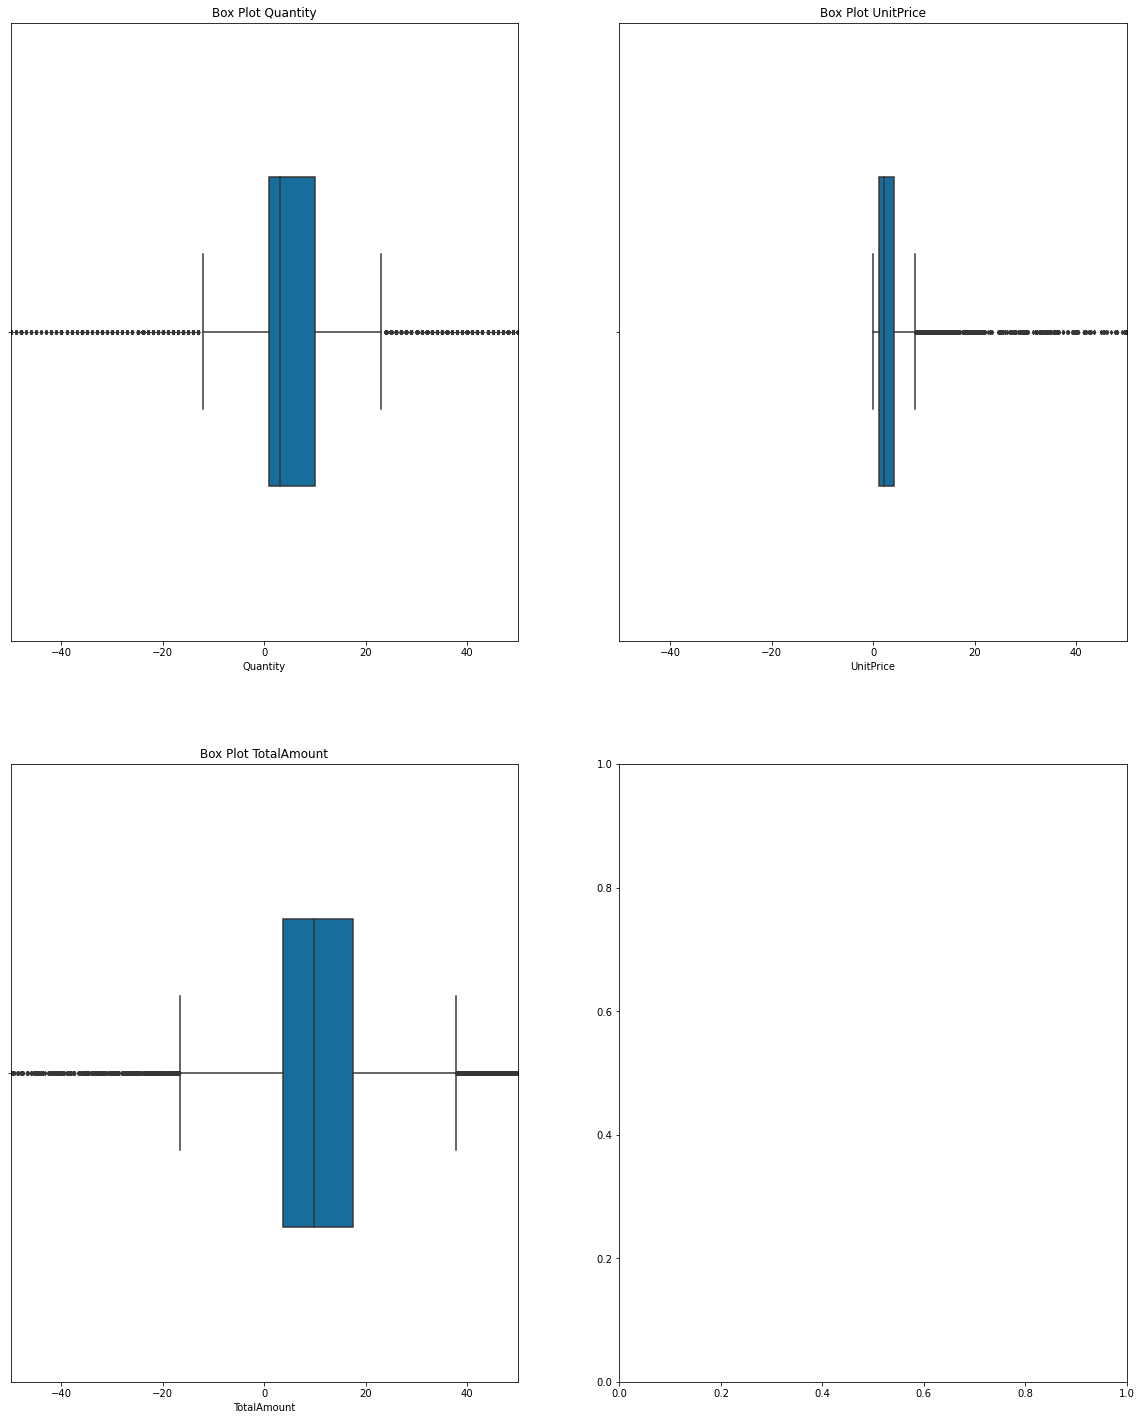

In [394]:
# Outlier check using Box Plot 
cols_ = data_outlier.columns
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(20, 25))
i = 0
j = 0

for col_name in cols_ :
    bp2 = sns.boxplot(x=col_name, 
             data=data_, 
             palette="colorblind",
             width=0.5,
             fliersize=3,
             ax=axis[i,j])
    bp2.set_xlim(-50, 50)
    
    axis[i,j].set_title('Box Plot '+col_name)
    if j != 1:
        j+=1
    else:
        j = 0
        i+= 1
plt.show()




#### Observation 
- There are 58501 number of outler records in Column Quanity 
- There are 39450 number of outlier records in column UnitPrice
- There are 45626 number of outlier records in column TotalAmount

- Not removing outlier because the company's clientele includes a significant number of wholesale customers . Due to which the there can be increase in Quantity and TotalAmount as compared to normal customer orders . Also Outlier in UnitPrice (in values greater than upper wisker) signify there are some products which are very expensive (high value goods) being bought by customers.

## 4 .Non Grpahical Analysis

In [395]:
data_.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceType,TotalAmount,InvoiceYear,InvoiceMonth,TransactionType
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,Normal,15.30,2010,12,PurchaseTransaction
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Normal,20.34,2010,12,PurchaseTransaction
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,Normal,22.00,2010,12,PurchaseTransaction
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Normal,20.34,2010,12,PurchaseTransaction
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Normal,20.34,2010,12,PurchaseTransaction


### 4.1 Customer Analysis

In [396]:
#Top 10 Customers based on TotalAmount spend
top_customer = data_.groupby('CustomerID')['TotalAmount'].sum().sort_values(ascending=False).head(10)
top_customer

CustomerID
0        1447487.53
14646     279489.02
18102     256438.49
17450     187322.17
14911     132458.73
12415     123725.45
14156     113214.59
17511      88125.38
16684      65892.08
13694      62690.54
Name: TotalAmount, dtype: float64

In [397]:
# CustomerID  represent Null value which w ehave replaced with 0

In [398]:
#Lowest 10 Customers based on TotalAmount spend
low_customer = data_.groupby('CustomerID')['TotalAmount'].sum().sort_values(ascending=True).head(10)
low_customer

CustomerID
17448   -4287.63
15369   -1592.49
14213   -1192.20
17603   -1165.30
12503   -1126.00
15823    -840.76
13154    -611.86
15802    -451.42
16252    -295.09
12666    -227.44
Name: TotalAmount, dtype: float64

### 4.2 Product Analysis

In [399]:
#Top 10 selling products
top_sell_products = data_.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
top_sell_products

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53751
JUMBO BAG RED RETROSPOT               47260
POPCORN HOLDER                        36322
ASSORTED COLOUR BIRD ORNAMENT         36282
PACK OF 72 RETROSPOT CAKE CASES       36016
WHITE HANGING HEART T-LIGHT HOLDER    35298
RABBIT NIGHT LIGHT                    30631
MINI PAINT SET VINTAGE                26437
PACK OF 12 LONDON TISSUES             26299
PACK OF 60 PINK PAISLEY CAKE CASES    24719
Name: Quantity, dtype: int64

In [400]:
# Lowest 10 selling products / Top 10 return products
low_sell_products = data_.groupby('Description')['Quantity'].sum().sort_values().head(10)
low_sell_products

Description
printing smudges/thrown away   -19200
Unsaleable, destroyed.         -15644
NA                             -13609
check                          -12030
Printing smudges/thrown away    -9058
Damaged                         -7540
throw away                      -5368
damages                         -4338
incorrect stock entry.          -4320
thrown away                     -4110
Name: Quantity, dtype: int64

### 4.3 Monthly Sales Analysis

In [401]:
# Monthly Sales 
month_sales = data_.groupby(data_['InvoiceMonth'])['TotalAmount'].sum().sort_index()
month_sales

InvoiceMonth
1      558448.560
2      497026.410
3      682013.980
4      492367.841
5      722094.100
6      689977.230
7      680156.991
8      681386.460
9     1017596.682
10    1069368.230
11    1456145.800
12    1179424.670
Name: TotalAmount, dtype: float64

In [402]:
# Calculating % of each month sales contribution 
(month_sales / month_sales.sum()) * 100

InvoiceMonth
1      5.741807
2      5.110282
3      7.012271
4      5.062384
5      7.424363
6      7.094147
7      6.993178
8      7.005819
9     10.462636
10    10.994936
11    14.971671
12    12.126504
Name: TotalAmount, dtype: float64

In [403]:
# Calculating Average Order Value (AOV)
average_order_value = data_.groupby('InvoiceNo')['TotalAmount'].sum().mean()
print("Average Order Value (AOV):", average_order_value, "\n")

Average Order Value (AOV): 375.521504015451 



#### Observation : 
- Top  selling product is WORLD WAR 2 GLIDERS ASSTD DESIGNS 
- Least Sold Product printing smudges/thrown away  ( Has -vs quantity indicating it is most returned product) 
- Highets spend customer is 14646
- Average Order Value (AOV): 375.52
- Top 4 Months having highest revenue are November (11) , December (12), October(10), September(9)
- November contributes to 14.97 % of total sales , December contributes to 12.12% of total sales, October contributes to 10.99 % of total sales , September contributes to 10.46% of toral sales

## 5. Univariate and Bivariate Analysis

### 5.1. Top 10 country based on number of unique Customer Id

In [404]:
plot_ = data_.groupby(['Country','TransactionType']).agg({'CustomerID':pd.Series.nunique}).reset_index()
plot_.rename(columns={'CustomerID': 'Cnt_Unique_CustomerID'}, inplace=True)
plot_

,Country,TransactionType,Cnt_Unique_CustomerID
0,Australia,PurchaseTransaction,9
1,Australia,ReturnTransaction,4
2,Austria,PurchaseTransaction,11
3,Austria,ReturnTransaction,2
4,Bahrain,PurchaseTransaction,3
...,...,...,...
63,USA,ReturnTransaction,2
64,United Arab Emirates,PurchaseTransaction,2
65,United Kingdom,PurchaseTransaction,3922
66,United Kingdom,ReturnTransaction,1412


In [405]:
top_10_country = plot_.sort_values('Cnt_Unique_CustomerID', ascending = False)['Country'].unique()[:10]

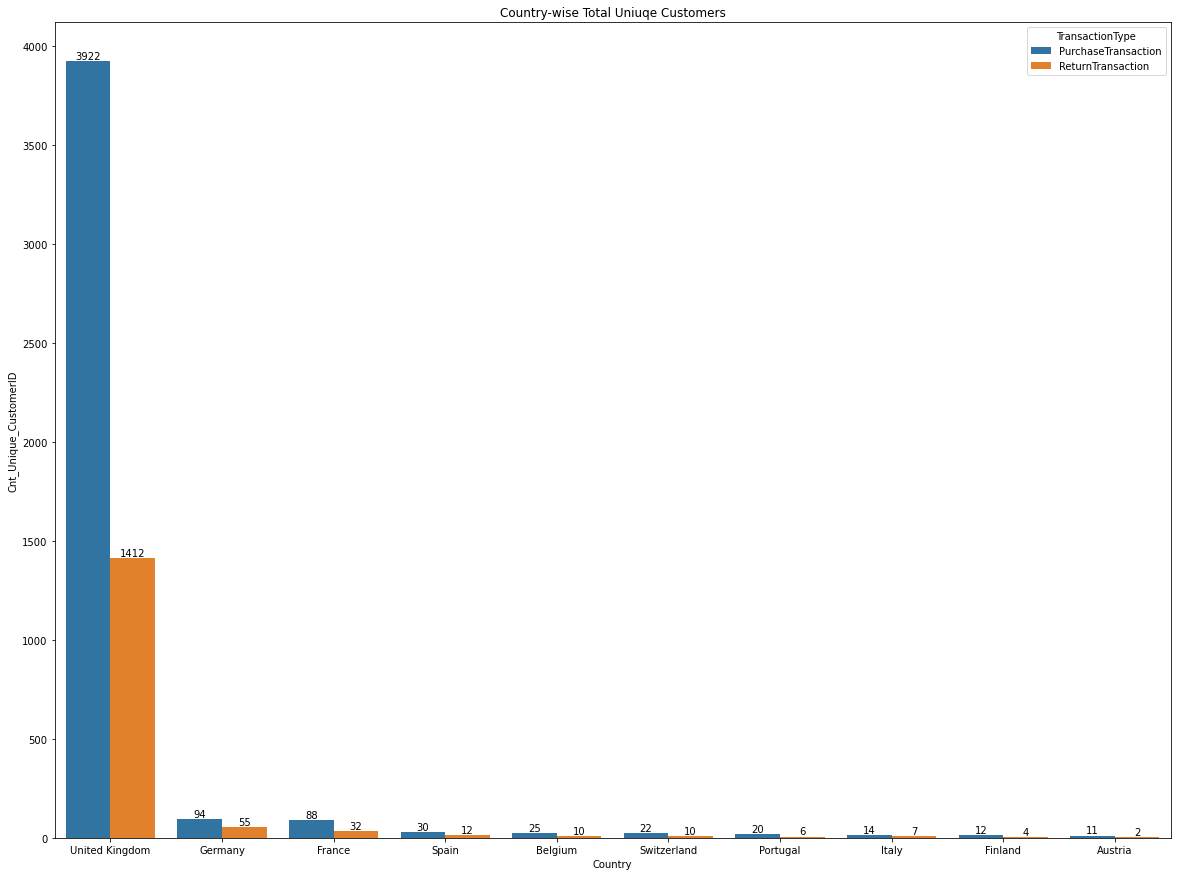

In [406]:
plt.figure(figsize=(20,15))

a=sns.barplot(data = plot_,x='Country',y='Cnt_Unique_CustomerID',hue='TransactionType',order=top_10_country)
for k in a.containers:
     a.bar_label(k)
plt.title('Country-wise Total Uniuqe Customers')
plt.show()

In [407]:
# Calculating how much each country data constitues whole data (Percentage)
plot_['PercentageCustomers'] = (plot_['Cnt_Unique_CustomerID']/plot_['Cnt_Unique_CustomerID'].sum()) * 100
plot_

,Country,TransactionType,Cnt_Unique_CustomerID,PercentageCustomers
0,Australia,PurchaseTransaction,9,0.151261
1,Australia,ReturnTransaction,4,0.067227
2,Austria,PurchaseTransaction,11,0.184874
3,Austria,ReturnTransaction,2,0.033613
4,Bahrain,PurchaseTransaction,3,0.050420
...,...,...,...,...
63,USA,ReturnTransaction,2,0.033613
64,United Arab Emirates,PurchaseTransaction,2,0.033613
65,United Kingdom,PurchaseTransaction,3922,65.915966
66,United Kingdom,ReturnTransaction,1412,23.731092


### 5.2 Country wise Analysis of Total Amount Spend

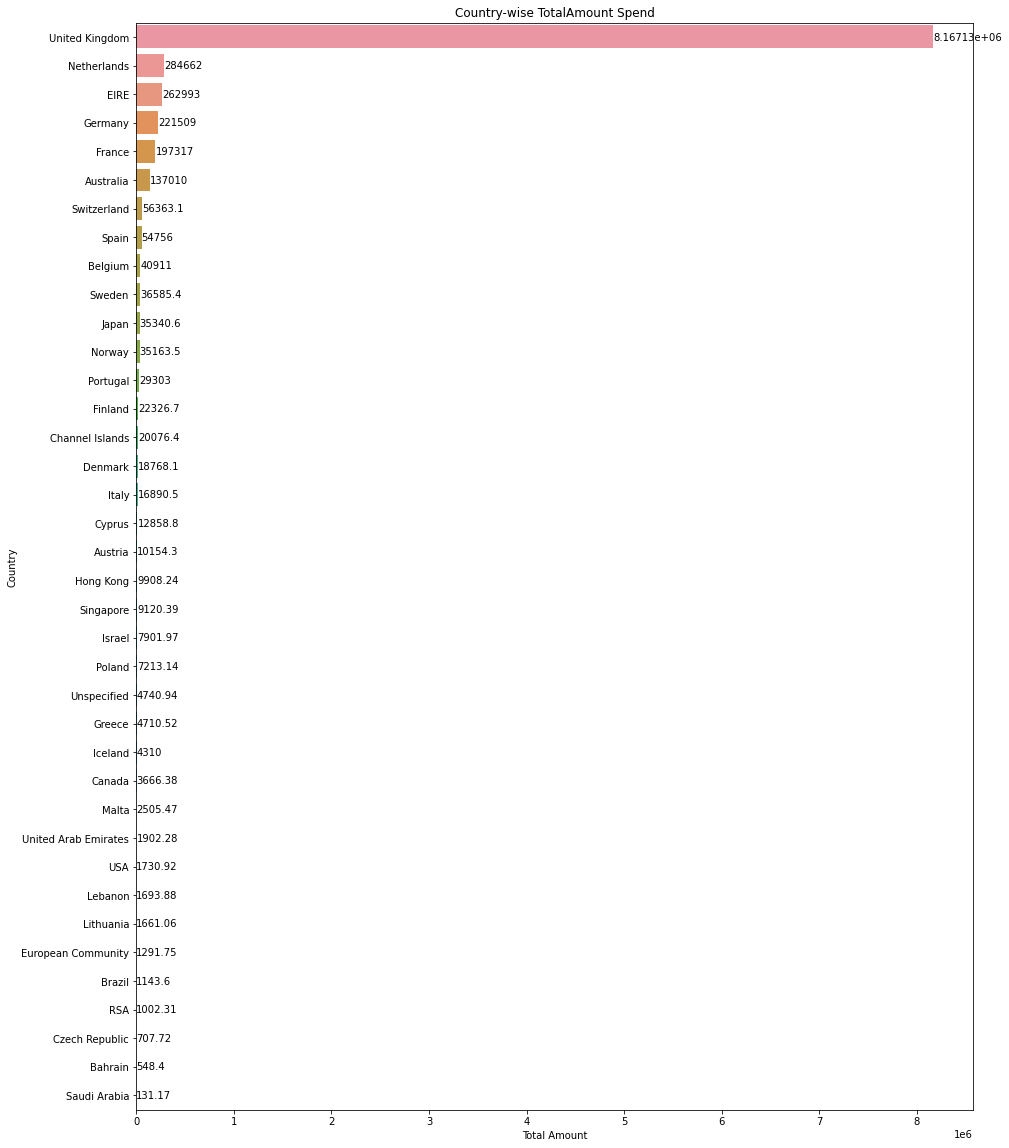

In [408]:
country_amount= data_.groupby('Country')['TotalAmount'].sum().sort_values(ascending=False)

plt.figure(figsize=(15, 20))
a = sns.barplot(x=country_amount.values, y=country_amount.index)
for k in a.containers:
     a.bar_label(k)
        
plt.title('Country-wise TotalAmount Spend')
plt.xlabel('Total Amount')
plt.ylabel('Country')
plt.show()

### 5.3 Count of Customer vs  Invoice Time Bins 

In [409]:
data_["InvoiceDate"].dt.hour.value_counts()

12    77573
15    76938
13    71247
14    66572
11    56949
16    54134
10    48808
9     34314
17    28371
8      8906
18     7941
19     3617
20      847
7       383
6        41
Name: InvoiceDate, dtype: int64

In [410]:
bins_ = [6,12,17,20,24]
labels_ =['Morning','Afternoon','Evening','Night']
data_["Invoice_TimeBin"] = pd.cut(data_["InvoiceDate"].dt.hour, 
                                       bins=bins_, 
                                       labels=labels_ , right =False)

In [411]:
plot_ = data_.groupby(['Invoice_TimeBin','TransactionType']).agg({'CustomerID':pd.Series.nunique}).reset_index()
plot_.rename(columns={'CustomerID': 'Cnt_Unique_CustomerID'}, inplace=True)
plot_

,Invoice_TimeBin,TransactionType,Cnt_Unique_CustomerID
0,Morning,PurchaseTransaction,2520
1,Morning,ReturnTransaction,764
2,Afternoon,PurchaseTransaction,3566
3,Afternoon,ReturnTransaction,1114
4,Evening,PurchaseTransaction,590
5,Evening,ReturnTransaction,355
6,Night,PurchaseTransaction,15
7,Night,ReturnTransaction,10


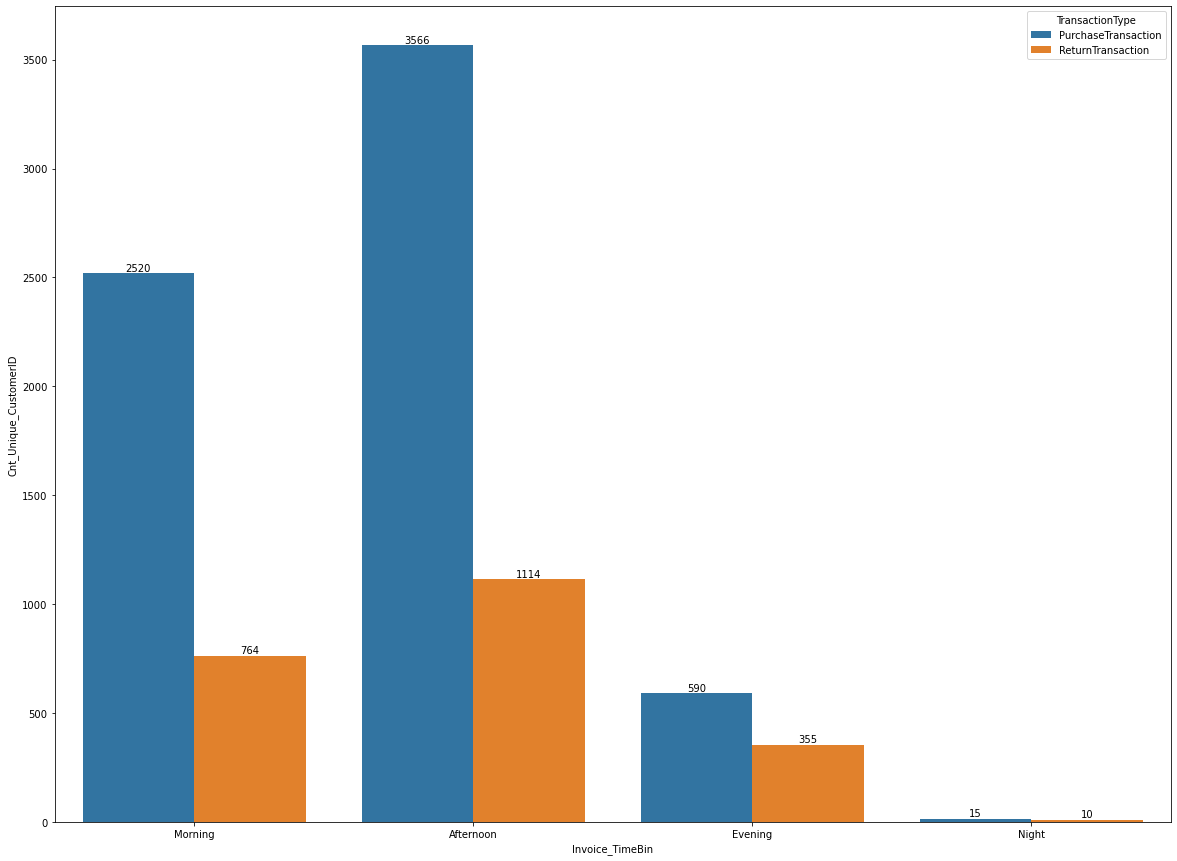

In [412]:
plt.figure(figsize=(20,15))

a=sns.barplot(data = plot_ ,x='Invoice_TimeBin',y='Cnt_Unique_CustomerID' ,hue = 'TransactionType')
for k in a.containers:
     a.bar_label(k)

plt.show()

### 5.4. Monthly Unique Customers

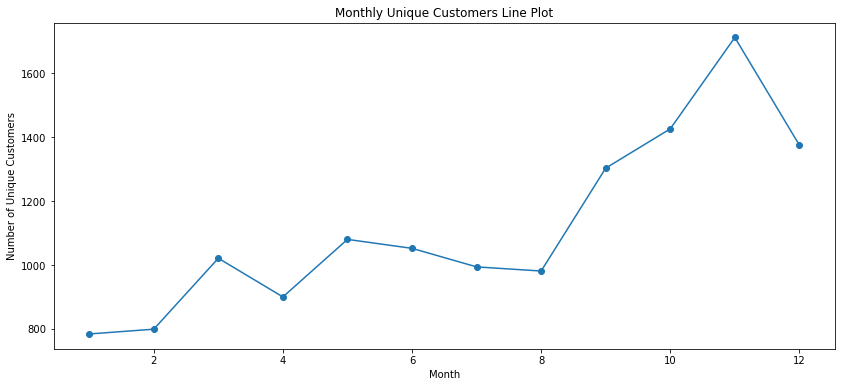

In [413]:
monthly_unique_cust = data_.groupby(data_['InvoiceMonth'])['CustomerID'].nunique()

plt.figure(figsize=(14, 6))
monthly_unique_cust.plot(kind='line', marker='o')

plt.title('Monthly Unique Customers Line Plot')
plt.xlabel('Month')
plt.ylabel('Number of Unique Customers')
plt.show()

### 5.5 Month and Weekly Sales Trend

C:\Users\Harman\AppData\Local\Temp/ipykernel_18692/107672996.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  weekly_sales_trend = data_.groupby(data_['InvoiceDate'].dt.week)['Quantity'].sum()


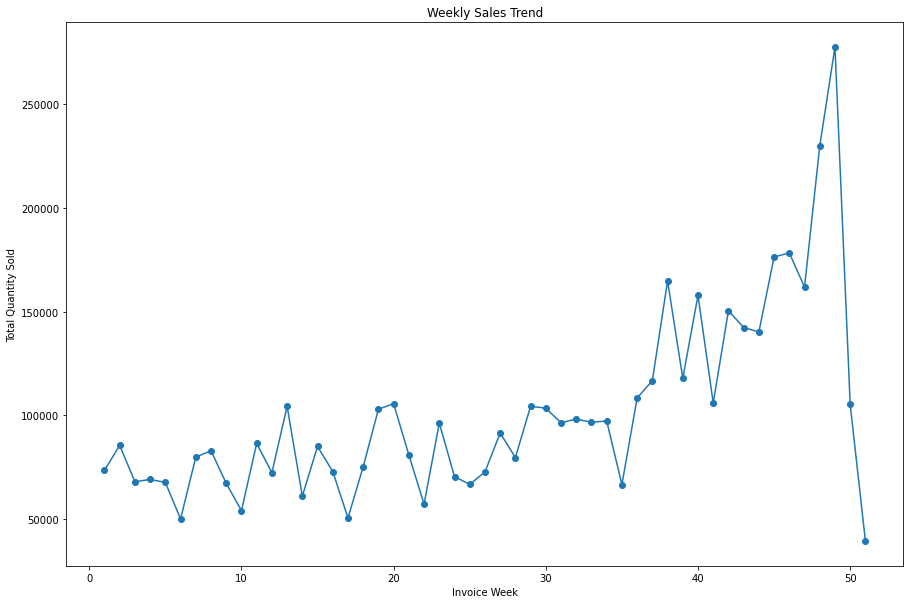

In [414]:
# Weekly Sales Trend
weekly_sales_trend = data_.groupby(data_['InvoiceDate'].dt.week)['Quantity'].sum()

plt.figure(figsize=(15, 10))
weekly_sales_trend.plot(kind='line', marker='o')
plt.title('Weekly Sales Trend')
plt.xlabel('Invoice Week')
plt.ylabel('Total Quantity Sold')
plt.show()

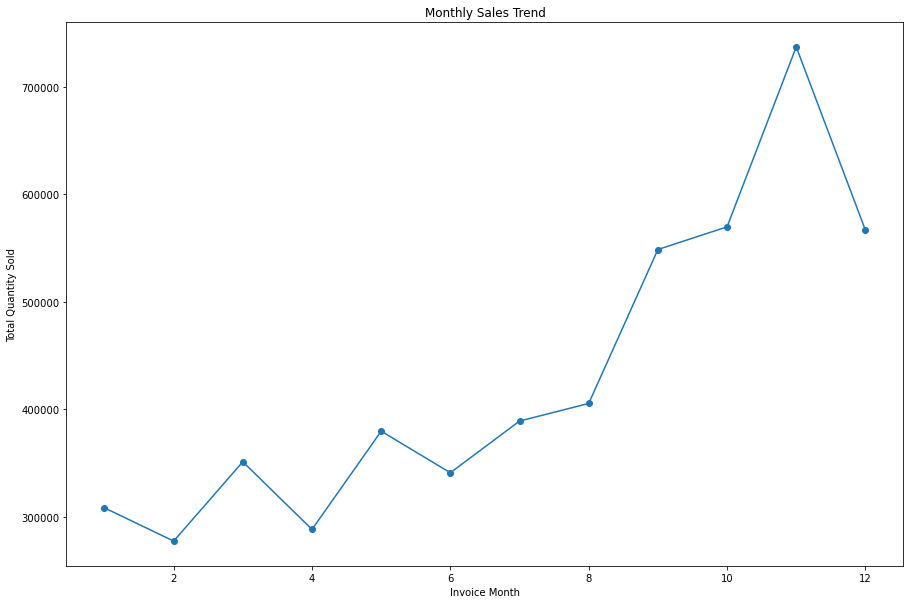

In [415]:
# Monthly Sales Trend
monthly_sales_trend = data_.groupby(data_['InvoiceDate'].dt.month)['Quantity'].sum()

plt.figure(figsize=(15, 10))
monthly_sales_trend.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Invoice Month')
plt.ylabel('Total Quantity Sold')
plt.show()

### 5.6. Heat Map to show relation between columns

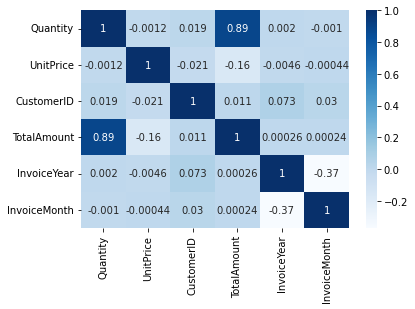

In [416]:
sns.heatmap(data_.corr(),cmap='Blues',annot=True)
plt.show()

#### Observation :
-  Most of the customers in data are from UK follwed by Germany, France,Spain , etc.
- As most of the customer are from UK hence total spend amount in UK is largest 
- Most of customers are placing Transaction (Purchase and Return) in Afternoon time , follwed by Morning , Evening and least orders placed in night
- On Seeing Monthly Unique customer trend we see that month on month the count of unique customer is increaing from Jan to December with slight dip in count in month of April (4) and December (12) .(Note : Unique customer count dip is also there as we go from May to August but it is very less) .
- Monthly Sales trend is also looking good as overall the TotalAmount spend increases from Jan to Decmeber (on seeing quarterly basis ) 

## 6. Customer Relationship Management (CRM) analytics

### 6.1 Calculating RFM Values
- For recency, we’ll calculate the difference between the most recent purchase date (max value) and invoice date. This gives the number of days since the customer's last purchase. So smaller values indicate that a customer has made a purchase more recently.
- Frequency measures how often a customer makes purchases, we’ll calculate it as the total number of unique invoices or transactions made by each customer.
- Monetary value quantifies how much money a customer spends.

In [417]:
print('Min Invoice Date : ',data_['InvoiceDate'].min())
print('Max Invoice Date : ',data_['InvoiceDate'].max())

Min Invoice Date :  2010-12-01 08:26:00
Max Invoice Date :  2011-12-09 12:50:00


In [418]:
# Calculate Recency
#data_['Recency'] = (data_['InvoiceDate'].max() - data_['InvoiceDate']).dt.days

latest_ = data_['InvoiceDate'].max()
rec_data = data_.groupby('CustomerID').agg({'InvoiceDate' : lambda x: (latest_ - x.max()).days})
rec_data.rename(columns={'InvoiceDate': 'Recency'}, inplace=True)
data_ = data_.merge(rec_data, on='CustomerID', how='left')

# Calculate Frequency
freq_data = data_.groupby('CustomerID').agg({'InvoiceNo':pd.Series.nunique}).reset_index()
freq_data.rename(columns={'InvoiceNo': 'Frequency'}, inplace=True)
data_ = data_.merge(freq_data, on='CustomerID', how='left')

# Calculate Monetary Value
monetary_data = data_.groupby('CustomerID')['TotalAmount'].sum().reset_index()
monetary_data.rename(columns={'TotalAmount': 'Monetary'}, inplace=True)
data_ = data_.merge(monetary_data, on='CustomerID', how='left')
data_ 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceType,TotalAmount,InvoiceYear,InvoiceMonth,TransactionType,Invoice_TimeBin,Recency,Frequency,Monetary
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,Normal,15.30,2010,12,PurchaseTransaction,Morning,301,35,5303.48
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Normal,20.34,2010,12,PurchaseTransaction,Morning,301,35,5303.48
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,Normal,22.00,2010,12,PurchaseTransaction,Morning,301,35,5303.48
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Normal,20.34,2010,12,PurchaseTransaction,Morning,301,35,5303.48
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Normal,20.34,2010,12,PurchaseTransaction,Morning,301,35,5303.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536636,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,Normal,10.20,2011,12,PurchaseTransaction,Afternoon,0,4,862.81
536637,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,Normal,12.60,2011,12,PurchaseTransaction,Afternoon,0,4,862.81
536638,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,Normal,16.60,2011,12,PurchaseTransaction,Afternoon,0,4,862.81
536639,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,Normal,16.60,2011,12,PurchaseTransaction,Afternoon,0,4,862.81


In [419]:
# Creating a new dataset for RFM analysis 
data_RFM = data_.copy()
data_RFM = data_RFM[['CustomerID','Recency','Frequency','Monetary' ]]
data_RFM = data_RFM.drop_duplicates().reset_index(drop = True)
data_RFM

,CustomerID,Recency,Frequency,Monetary
0,17850,301,35,5303.48
1,13047,31,18,3079.10
2,12583,2,18,7187.34
3,13748,95,5,948.25
4,15100,329,6,635.10
...,...,...,...,...
4368,13436,1,1,196.89
4369,15520,1,1,343.50
4370,13298,0,1,360.00
4371,14569,0,1,227.39


In [420]:
data_RFM.describe()

,CustomerID,Recency,Frequency,Monetary
count,4373.000000,4373.000000,4373.000000,4.373000e+03
mean,15296.179053,91.026298,5.922708,2.224104e+03
std,1737.665011,100.763317,56.798813,2.335391e+04
min,0.000000,0.000000,1.000000,-4.287630e+03
25%,13812.000000,16.000000,1.000000,2.918800e+02
50%,15300.000000,49.000000,3.000000,6.442400e+02
75%,16778.000000,142.000000,5.000000,1.610150e+03
max,18287.000000,373.000000,3710.000000,1.447488e+06


In [421]:
data_RFM.shape

(4373, 4)

In [422]:
# Higher score for lower recency (more recent)
data_RFM["RecencyScore"] = pd.cut(data_RFM["Recency"], 
                                       bins=[data_RFM["Recency"].min()-1, 
                                         np.percentile(data_RFM["Recency"], 20), 
                                             np.percentile(data_RFM["Recency"], 40), 
                                             np.percentile(data_RFM["Recency"], 60), 
                                             np.percentile(data_RFM["Recency"], 80),
                                             data_RFM["Recency"].max()+1], 
                                       labels=[5, 4, 3, 2, 1] ).astype("int")

In [423]:
data_RFM["RecencyScore"].value_counts()

4    904
5    877
1    875
2    860
3    857
Name: RecencyScore, dtype: int64

In [424]:
# Higher score for higher frequency
data_RFM["FrequencyScore"] = pd.cut(data_RFM["Frequency"], 
                                       bins=[data_RFM["Frequency"].min()-1, 
                                         np.percentile(data_RFM["Frequency"], 20), 
                                             np.percentile(data_RFM["Frequency"], 40), 
                                             np.percentile(data_RFM["Frequency"], 60), 
                                             np.percentile(data_RFM["Frequency"], 80),
                                             data_RFM["Frequency"].max()+1], 
                                       labels=[1, 2, 3, 4, 5] ).astype("int")

In [425]:
data_RFM["FrequencyScore"].value_counts()

1    1313
3     867
2     817
5     735
4     641
Name: FrequencyScore, dtype: int64

In [426]:
# Higher score for higher monetary value
data_RFM["MonetaryScore"] = pd.cut(data_RFM["Monetary"], 
                                       bins=[data_RFM["Monetary"].min()-1, 
                                         np.percentile(data_RFM["Monetary"], 20), 
                                             np.percentile(data_RFM["Monetary"], 40), 
                                             np.percentile(data_RFM["Monetary"], 60), 
                                             np.percentile(data_RFM["Monetary"], 80),
                                             data_RFM["Monetary"].max()+1], 
                                       labels=[1, 2, 3, 4, 5]).astype("int")

In [427]:
data_RFM["MonetaryScore"].value_counts()

5    875
3    875
1    875
4    874
2    874
Name: MonetaryScore, dtype: int64

In [428]:
data_RFM

,CustomerID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore
0,17850,301,35,5303.48,1,5,5
1,13047,31,18,3079.10,4,5,5
2,12583,2,18,7187.34,5,5,5
3,13748,95,5,948.25,2,4,4
4,15100,329,6,635.10,1,4,3
...,...,...,...,...,...,...,...
4368,13436,1,1,196.89,5,1,1
4369,15520,1,1,343.50,5,1,2
4370,13298,0,1,360.00,5,1,2
4371,14569,0,1,227.39,5,1,1


In [429]:
data_RFM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4373 entries, 0 to 4372
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      4373 non-null   int32  
 1   Recency         4373 non-null   int64  
 2   Frequency       4373 non-null   int64  
 3   Monetary        4373 non-null   float64
 4   RecencyScore    4373 non-null   int32  
 5   FrequencyScore  4373 non-null   int32  
 6   MonetaryScore   4373 non-null   int32  
dtypes: float64(1), int32(4), int64(2)
memory usage: 170.9 KB


###  6.2 Creating Segments based on RFM Score 


In [430]:
# Finding RFM Scores: Category
data_RFM["RFM_Score"] = (data_RFM['RecencyScore'].astype(str) + 
                     data_RFM['FrequencyScore'].astype(str) + 
                     data_RFM['MonetaryScore'].astype(str))
data_RFM

,CustomerID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score
0,17850,301,35,5303.48,1,5,5,155
1,13047,31,18,3079.10,4,5,5,455
2,12583,2,18,7187.34,5,5,5,555
3,13748,95,5,948.25,2,4,4,244
4,15100,329,6,635.10,1,4,3,143
...,...,...,...,...,...,...,...,...
4368,13436,1,1,196.89,5,1,1,511
4369,15520,1,1,343.50,5,1,2,512
4370,13298,0,1,360.00,5,1,2,512
4371,14569,0,1,227.39,5,1,1,511



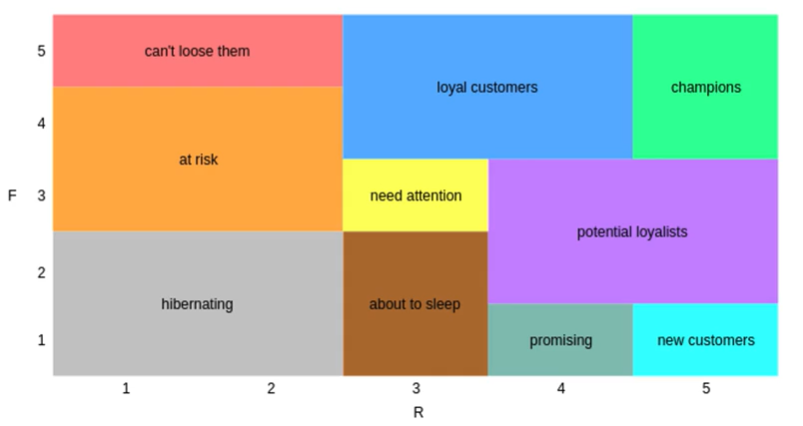

- Note : It is considered that that whenevr Frequency increases so does Monetary value, hence in picture above and in segement classification we only consider either Frequency /Monetary

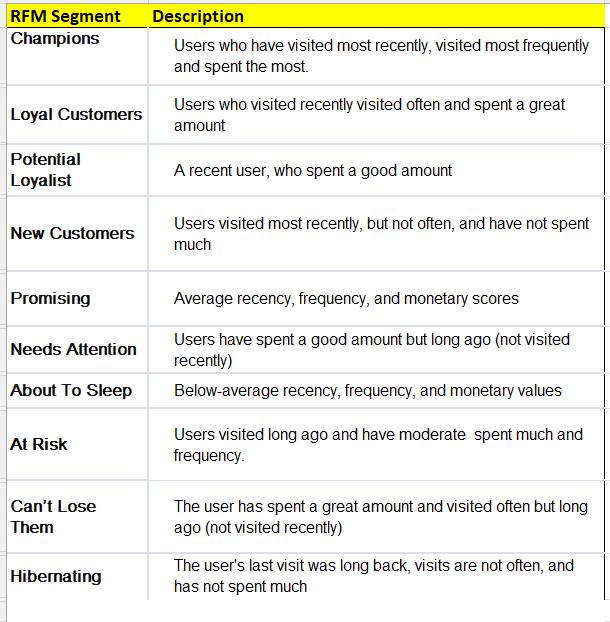

In [431]:
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

data_RFM['Segment'] = data_RFM['RecencyScore'].astype(str) + data_RFM['FrequencyScore'].astype(str)
data_RFM['Segment'] = data_RFM['Segment'].replace(seg_map, regex=True)

In [432]:
data_RFM

,CustomerID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Segment
0,17850,301,35,5303.48,1,5,5,155,Can't Loose
1,13047,31,18,3079.10,4,5,5,455,Loyal Customers
2,12583,2,18,7187.34,5,5,5,555,Champions
3,13748,95,5,948.25,2,4,4,244,At Risk
4,15100,329,6,635.10,1,4,3,143,At Risk
...,...,...,...,...,...,...,...,...,...
4368,13436,1,1,196.89,5,1,1,511,New Customers
4369,15520,1,1,343.50,5,1,2,512,New Customers
4370,13298,0,1,360.00,5,1,2,512,New Customers
4371,14569,0,1,227.39,5,1,1,511,New Customers


## 7. RFM Segment Analysis

### 7.1  Count of Customers present in each RFM Segment  

In [433]:
 data_RFM.groupby(data_RFM['Segment'])['CustomerID'].nunique()

Segment
About to Sleep          431
At Risk                 440
Can't Loose              51
Champions               562
Hibernating            1244
Loyal Customers         633
Need Attention          190
New Customers            59
Potential Loyalists     610
Promising               153
Name: CustomerID, dtype: int64

In [434]:
# Calculating % of Cusotmer belonging to each segment
(data_RFM.groupby(data_RFM['Segment'])['CustomerID'].nunique()/ 
 data_RFM.groupby(data_RFM['Segment'])['CustomerID'].nunique().sum()) * 100

Segment
About to Sleep          9.855934
At Risk                10.061743
Can't Loose             1.166247
Champions              12.851589
Hibernating            28.447290
Loyal Customers        14.475189
Need Attention          4.344843
New Customers           1.349188
Potential Loyalists    13.949234
Promising               3.498742
Name: CustomerID, dtype: float64

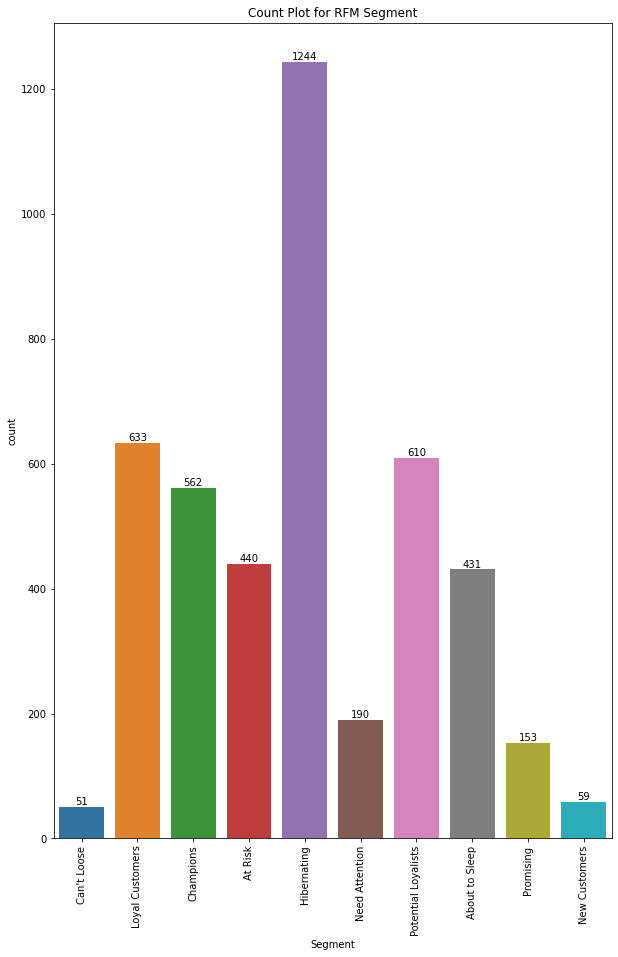

In [435]:
plt.figure(figsize= (10,15))
plot_ = sns.countplot(data =data_RFM , x ='Segment')
for k in plot_.containers:
     plot_.bar_label(k)
plt.title('Count Plot for RFM Segment')
plt.xticks(rotation=90)
plt.show()

### 7.2  Amount Spend by customers in Each RFM Segment 

In [436]:
segment_monetary = data_RFM.groupby(data_RFM['Segment'])['Monetary'].sum()
segment_monetary = segment_monetary.reset_index()
segment_monetary

,Segment,Monetary
0,About to Sleep,194986.330
1,At Risk,514226.372
2,Can't Loose,140224.290
3,Champions,5630644.530
4,Hibernating,484962.981
5,Loyal Customers,1978529.021
6,Need Attention,189499.790
7,New Customers,20515.990
8,Potential Loyalists,526981.160
9,Promising,45436.490


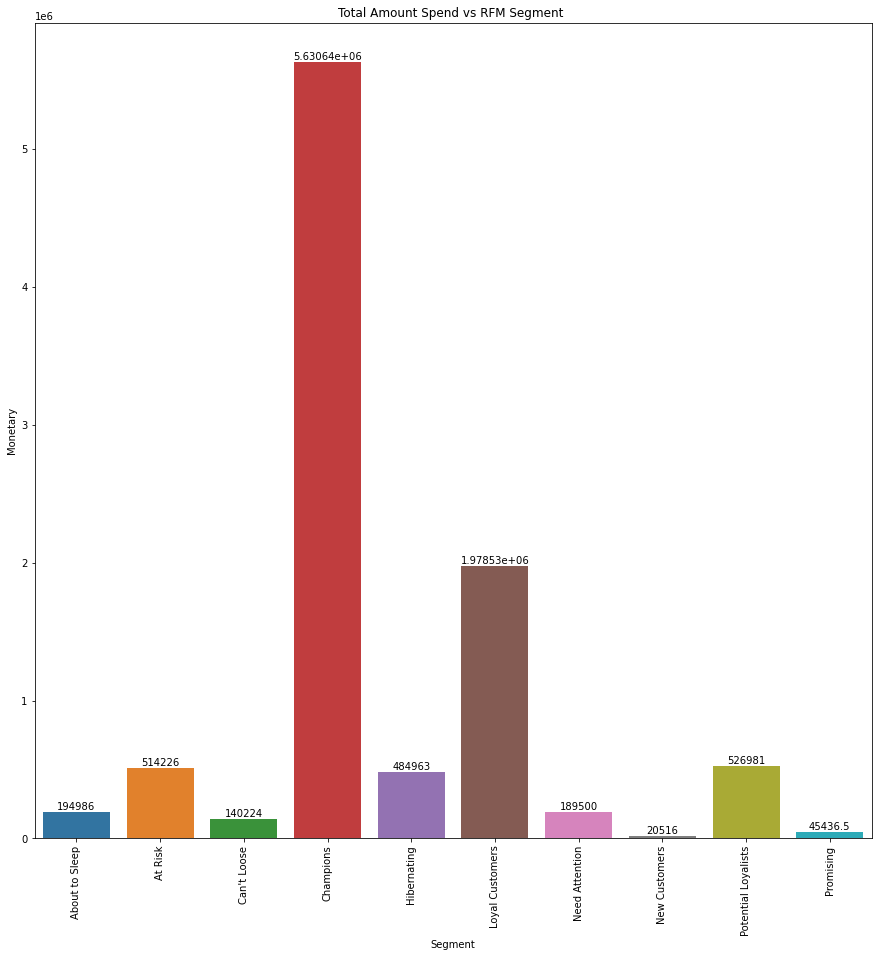

In [437]:
plt.figure(figsize= (15,15))
plot_ = sns.barplot(data =segment_monetary , x ='Segment', y = 'Monetary')
for k in plot_.containers:
     plot_.bar_label(k)
plt.title('Total Amount Spend vs RFM Segment ')
plt.xticks(rotation=90)
plt.show()

### 7.3  Calculating Max, Min, Mean , Standard Deviation and Count of Recency , Frequency ,Monetary 

In [438]:
# Calculating Count,Mean , StandardDeviation , Max and Min for each Recency , Monetary,Frequency for each Segment Type
data_RFM [['Recency','Monetary','Frequency','Segment']].groupby('Segment').agg({'count','mean','std','max','min'})

Recency                                     Monetary  \
                        max        mean min count        std         max   
Segment                                                                    
About to Sleep           70   50.798144  32   431  11.058138     6207.67   
At Risk                 365  144.036364  71   440  65.930961    21535.90   
Can't Loose             311  140.588235  71    51  72.991555    10217.48   
Champions                10    4.199288   0   562   3.299025  1447487.53   
Hibernating             373  210.721865  71  1244  91.516603     7829.89   
Loyal Customers          70   30.529226  11   633  15.645181   123725.45   
Need Attention           70   49.052632  32   190  10.953841     3613.15   
New Customers            10    5.661017   0    59   3.457177     3861.00   
Potential Loyalists      31   14.386885   0   610   9.156251    12393.70   
Promising                31   21.993464  11   153   5.563623     1764.72   

                                                               Frequency  \
                             mean      min count           std       max   
Segment                                                                    
About to Sleep         452.404478  -134.80   431    474.592989         2   
At Risk               1168.696300  -451.42   440   1494.051406         7   
Can't Loose           2749.495882   247.66    51   2106.715024        35   
Champions            10018.940445   220.10   562  64257.414551      3710   
Hibernating            389.841625 -4287.63  1244    507.366329         2   
Loyal Customers       3125.638264 -1165.30   633   6033.604191        76   
Need Attention         997.367316    -8.15   190    717.571770         4   
New Customers          347.728644    41.99    59    506.433497         1   
Potential Loyalists    863.903541   -17.45   610    898.865580         4   
Promising              296.970523     0.00   153    250.857519         1   

                                                      
                          mean min count         std  
Segment                                               
About to Sleep        1.403712   1   431    0.491211  
At Risk               4.034091   3   440    1.181182  
Can't Loose          10.803922   8    51    4.569550  
Champions            22.935943   5   562  157.177453  
Hibernating           1.321543   1  1244    0.467257  
Loyal Customers       9.165877   5   633    6.101409  
Need Attention        3.405263   3   190    0.492240  
New Customers         1.000000   1    59    0.000000  
Potential Loyalists   2.908197   2   610    0.835245  
Promising             1.000000   1   153    0.000000

### 7.4 RFM Scatter Plot 

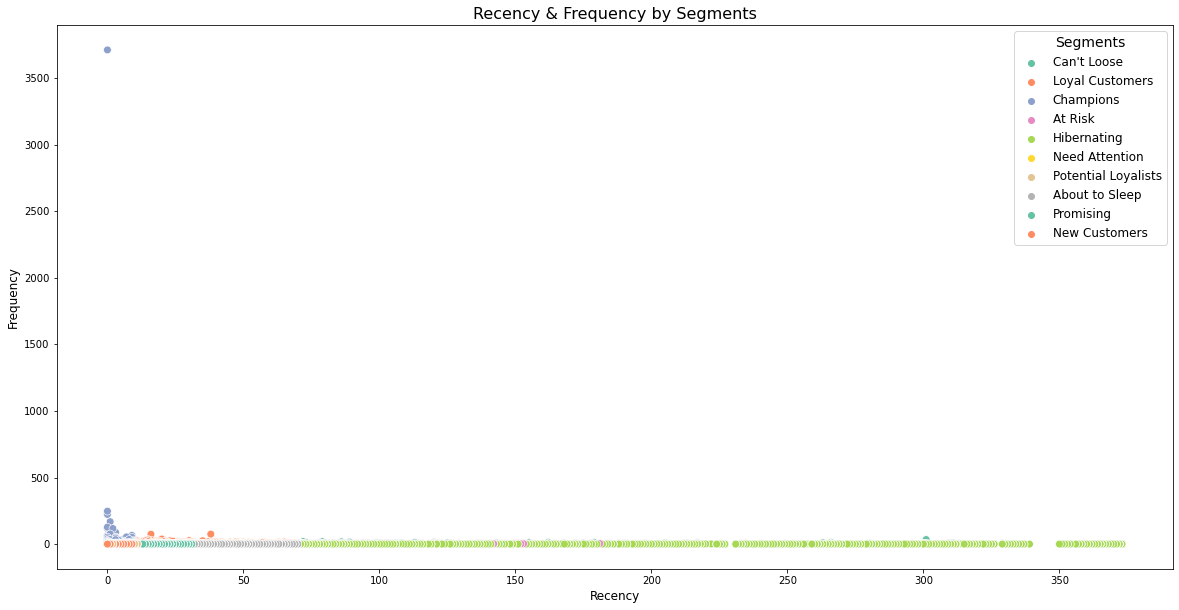

In [439]:
plt.figure(figsize=(20, 10))
a = sns.scatterplot(
    data=data_RFM, x="Recency", y="Frequency", hue="Segment", s=60,palette='Set2'
)
plt.title("Recency & Frequency by Segments", size=16)
plt.xlabel("Recency", size=12)
plt.ylabel("Frequency", size=12)
plt.xticks(size=10)
plt.yticks(size=10)
plt.legend( fontsize=12, title="Segments", title_fontsize=14)
plt.show()

- Note : There is a vary high value of Frequncy present ( outlier) . Most of records having Frequency in range 0 to 300 .So plotting another graph below limiting Y axis values , to get more zoomed graph.

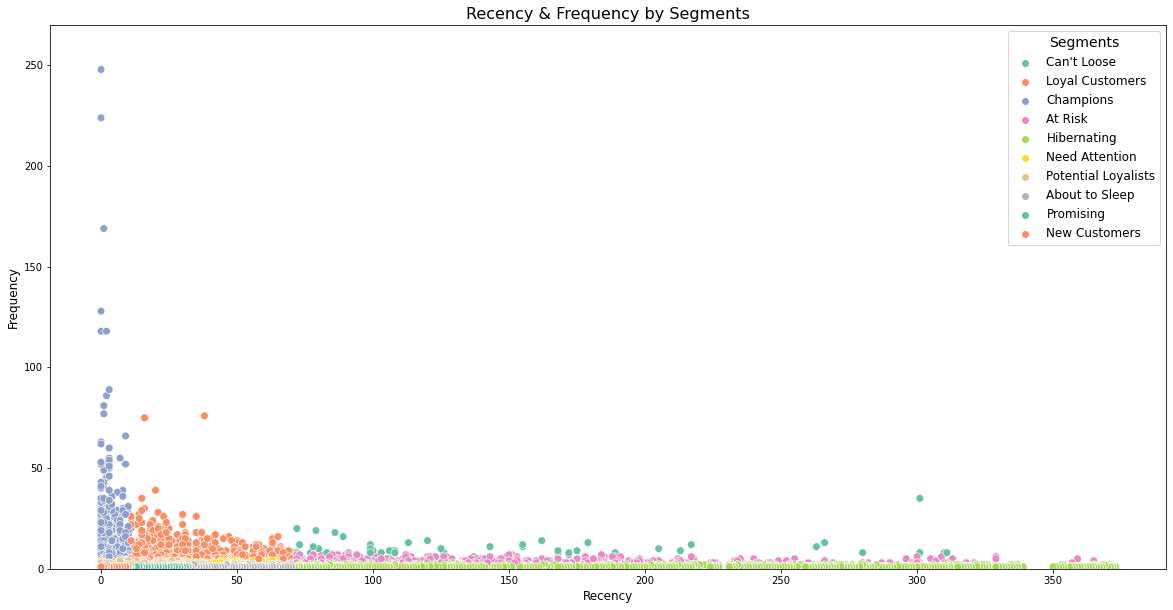

In [440]:
plt.figure(figsize=(20, 10))
a = sns.scatterplot(
    data=data_RFM, x="Recency", y="Frequency", hue="Segment", s=60,palette='Set2'
)
a.set_ylim(0, 270)
plt.title("Recency & Frequency by Segments", size=16)
plt.xlabel("Recency", size=12)
plt.ylabel("Frequency", size=12)
plt.xticks(size=10)
plt.yticks(size=10)

plt.legend( fontsize=12, title="Segments", title_fontsize=14)
plt.show()


### 7.5 Recency Score , Frequency Score and Monetary Score Histogram Plot

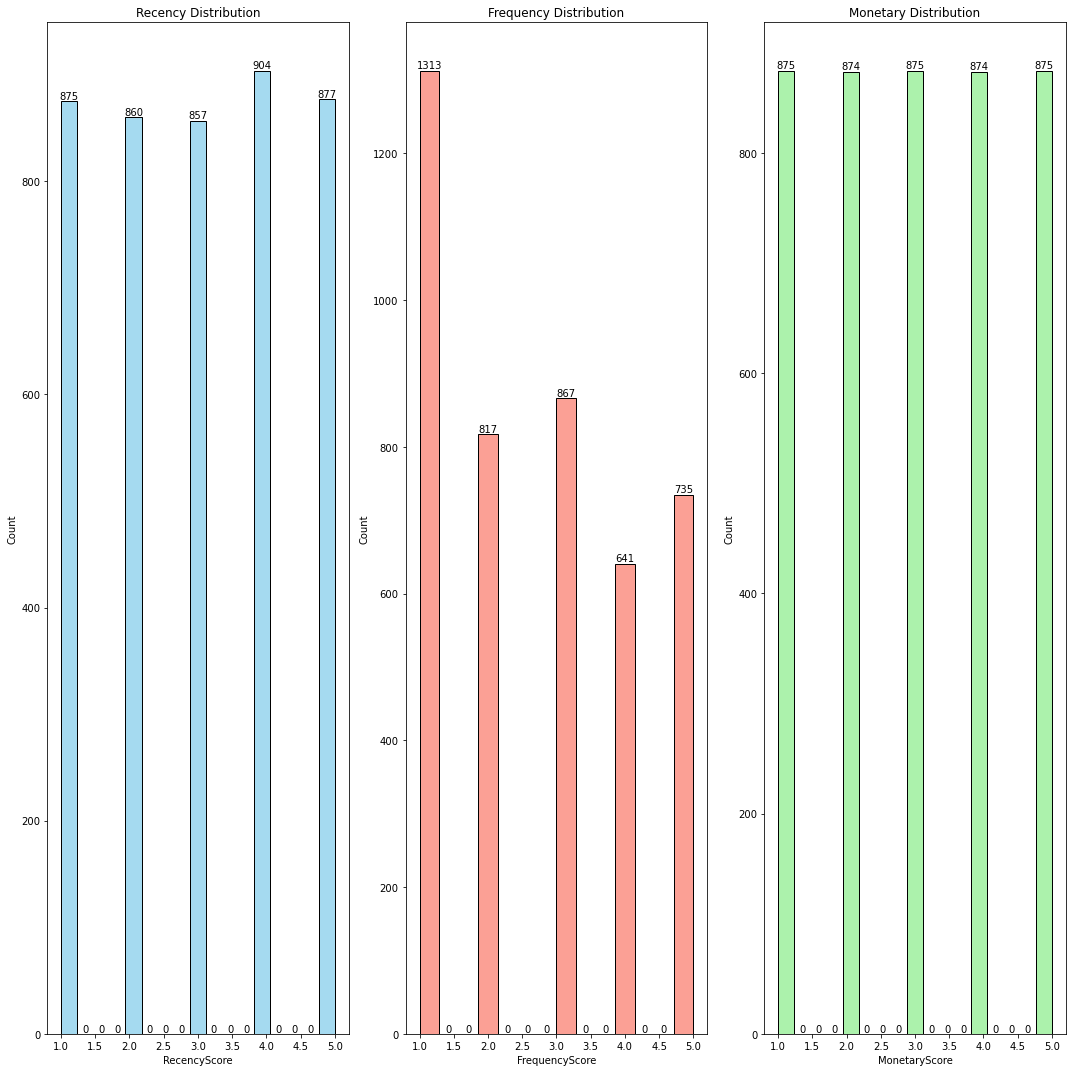

In [441]:
# Plotting Recency, Frequency, and Monetary Score distributions
plt.figure(figsize=(15, 15))

plt.subplot(1, 3, 1)
plot_1 = sns.histplot(data_RFM['RecencyScore'], color='skyblue')
for k in plot_1.containers:
     plot_1.bar_label(k)
plt.title('Recency Distribution')

plt.subplot(1, 3, 2)
plot_2 = sns.histplot(data_RFM['FrequencyScore'], color='salmon')
for k in plot_2.containers:
     plot_2.bar_label(k)
plt.title('Frequency Distribution')

plt.subplot(1, 3, 3)
plot_3 = sns.histplot(data_RFM['MonetaryScore'],color='lightgreen')
for k in plot_3.containers:
     plot_3.bar_label(k)
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()

In [442]:
data_RFM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4373 entries, 0 to 4372
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      4373 non-null   int32  
 1   Recency         4373 non-null   int64  
 2   Frequency       4373 non-null   int64  
 3   Monetary        4373 non-null   float64
 4   RecencyScore    4373 non-null   int32  
 5   FrequencyScore  4373 non-null   int32  
 6   MonetaryScore   4373 non-null   int32  
 7   RFM_Score       4373 non-null   object 
 8   Segment         4373 non-null   object 
dtypes: float64(1), int32(4), int64(2), object(2)
memory usage: 239.3+ KB


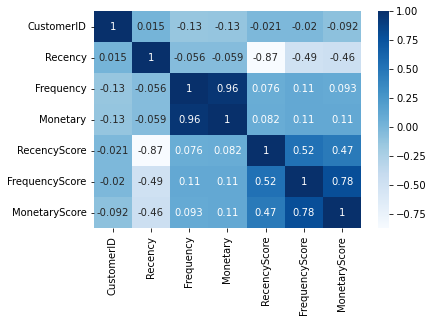

In [443]:
# Heat Map Plot
sns.heatmap(data_RFM.corr(),cmap='Blues',annot=True)
plt.show()

#### Observation 
- Have devided customers on the bases on RFM_Score into 10 categories :- 'Hibernating', 'At Risk', 'Can't Loose','About to Sleep','Need Attention','Loyal Customers', 'Promising','New Customers','Potential Loyalists' and 'Champions'

- Most of the Customers are belong to Hibernating Category 
- Highest Monetary (or Customer Life Time Value ) is of customers belonging to Champions Segment followed by Loyal Customer Segment 

## 8. Observation and Recommendations: 

#### Basic EDA Observations on Dataset
- There are around 5268 duplicate records . Have droped the duplicate records from data.
- Column : Description and CustomerID are having Null values 
- Percentage of null values in CustomerID is 25.16 %  (approx).Replaced all Null values with 0
- Percentage of null values in Description is 0.27 % (approx).Replaced all Null values with 'NA'
- Most of the customers are from United Kingdom country .
- There are 4373 unique customers in dataset.

- Note : Invoice number that consists 6 digits. If this code starts with letter 'c', it indicates a cancellation.Creating a new column to identify if it is cancellation (Cancellation) or adjustoment of bad debt (AdjustBadDebt) or a normal invoice (Normal).

- Note : Bad debt refers to loans or outstanding balances owed that are no longer deemed recoverable and must be written off.


- There are 526054 Purchase Transaction records which amount to 98% of data .
- There are 10587 Return Transaction records which amount to 1.97 % of data.
- There are 9251 cancellation invoices . For all cancellation invoice the quantity is negative so it is a return transaction. So above return transaction count includes the cancellation invoices also. 
- There are 3 invoices to Adjust Bad Debt.

#### Outlier Observations 
- There are 80995 number of outler records in Column Quanity 
- There are 39450 number of outlier records in column UnitPrice
- There are 45626 number of outlier records in column TotalAmount

- Not removing outlier because the companys clientele includes a significant number of wholesale customers . Due to which the there can be increase in Quantity and TotalAmount as compared to normal customer orders . Also Outlier in UnitPrice (in values greater than upper wisker) signify there are some products which are very expensive (high value goods) being bought by customers.

#### Non Grpahical Analysis
- Top  selling product is WORLD WAR 2 GLIDERS ASSTD DESIGNS 
- Least Sold Product printing smudges/thrown away  ( Has -vs quantity indicating it is most returned product) 
- Highets spend customer is 14646
- Average Order Value (AOV): 375.52
- Top 4 Months having highest revenue are November (11) , December (12), October(10), September(9)
- November contributes to 14.97 % of total sales , December contributes to 12.12% of total sales, October contributes to 10.99 % of total sales , September contributes to 10.46% of toral sales


#### Univariate and Bi-Variate Analysis
-  Most of the customers in data are from UK follwed by Germany, France,Spain , etc.
- As most of the customer are from UK hence total spend amount in UK is largest 
- Most of customers are placing Transaction (Purchase and Return) in Afternoon time , follwed by Morning , Evening and least orders placed in night
- On Seeing Monthly Unique customer trend we see that month on month the count of unique customer is increaing from Jan to December with slight dip in count in month of April (4) and December (12) .(Note : Unique customer count dip is also there as we go from May to August but it is very less) .
- Monthly Sales trend is also looking good as overall the TotalAmount spend increases from Jan to Decmeber (on seeing quarterly basis ) 

#### RFM Segmenation Analysis
- Have devided customers on the bases on RFM_Score into 10 categories :- 'Hibernating', 'At Risk', 'Cant Loose','About to Sleep','Need Attention','Loyal Customers', 'Promising','New Customers','Potential Loyalists' and 'Champions'
- Most of the Customers are belong to Hibernating Category . This number of customer are those who are having least recency and least frequency and least spend. Efforts like Email Tragetiing , Special dicounts can be given to convert them to 'Need Attention' RFM segment and then to 'Loyal Customer'or 'Champion Customer' Segment.
- Highest Monetary (or Customer Life Time Value ) is of customers beonging to Champions Segment followed by Loyal Customer Segment 
- Very low count of 'Cant Loose' customer count means it is very good as most of the Highe Frequency / High Monetary (high spend) users are having highere recency .

#### Recommendations 
- Introduce targeted campaigns in seasonal / months where count of orders less .Similarly, leverage events/festivals via personalized promotions. 

- Structure personalized loyalty programs with differentiated privileges and discounts for high-value power users. However, maintain adequate focus on the average consumer segment which currently generates maximum revenue.

- Allocate marketing budget to highest traction markets of UK and select European countries. However, expand presence in Australia and China to capitalize on latent demand.
- For Loyal customers schemes like cashback can be given on the bases on new customers joing the platform using Loyal Customer referal code can be given.
- Special campaign need to be run for customer belonging to RFM segment -hibernating , at risk , cant loose them , need attention , about to sleep  to convert them to potential loyalist and loyal customers . 

#####  Engagement Strategies for RFM Segments
- The RFM segment predicts user behavior and accordingly, marketers can take action to make the best of these user segments. Here are some basic strategies which can be used for different RFM Segments:
- Champions : Reward these users. They promote your products, they can be early adopters for your new launches.
- Loyal Customers :These users are responsive to your promotions, and you can suggest to them higher-value products. Also, ask them for reviews.
- Potential Loyalist : Engage them with long-term offers like loyalty programs or membership rewards. Suggest other categories of products to them.
- Recent Users/New Customers :For new users, make their onboarding experience smooth and provide assistance when needed.
- Promising : Make them loyal by creating brand awareness and giving free trials.
- Needs Attention :Need to bring back these customers, provide limited-period offers, and recommend products using purchase history.
- About To Sleep :The user will be lost if not reactivated. Recommend them popular products and provide discounts for memberships.
- Price sensitive :Users looking for the best deal, recommend them the highest rated products and send discount communications.
-Can’t Lose Them : Listen to their feedback, suggest them newer products, and make them stick to your platform.
- Hibernating :Recommend products for other categories and provide personalized offers.We need Make the presence more known through different campaigns.